In [0]:
import math,numpy as np,matplotlib.pyplot as plt, tensorflow as tf
from tensorflow.python.framework import ops
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')

In [0]:
pdf=np.load("/gdrive/My Drive/svr.npy",allow_pickle=True)
pdf_new=pd.read_csv("/gdrive/My Drive/ANN Data Set/New Data using Forces/Airfoil_28_131119/data.csv")
pdf_new2=pd.read_csv("/gdrive/My Drive/ANN Data Set/New Data using Forces/Airfoil_28_131119/data.csv")


In [0]:
np.savetxt("foo.csv",pdf,delimiter=',')

[-0.13140098 -0.07242784 -0.06535785 ... -0.01637026  0.00397537
  0.05792638]


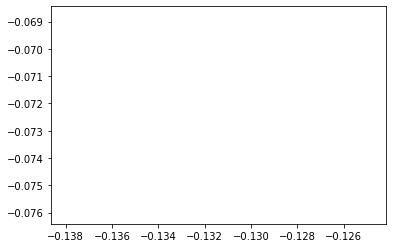

In [0]:
print(pdf)
plt.plot(pdf[0],pdf[1])
plt.show()

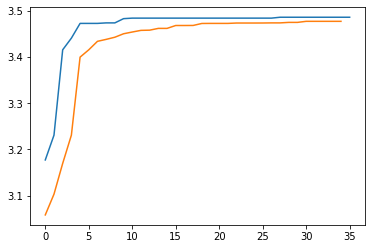

In [0]:
a=pdf_new.values
ma=[a[0][-1]]
mi=[]
j=0
for i in range(a.shape[0]-1):
  if a[i+1][-1]>a[i][-1]:
    ma.append(a[i+1][-1])
    j=0
  if(j==10):
    mi.append(a[i][-1])
  j+=1
plt.plot(np.arange(len(ma)),ma)
plt.plot(np.arange(len(mi)),mi)
plt.show()
ma=np.array(ma)
mi=np.array(mi)
np.save("max.npy",ma)
np.save("min.npy",mi)

In [0]:
from sklearn.utils import shuffle
pdf_new=pdf_new.append(pdf_new2,ignore_index=True)
print(pdf_new)
#pdf_new=shuffle(pdf_new)

0       3.177308
1       3.157211
2       3.141899
3       3.103260
4       3.067495
          ...   
1451    3.317255
1452    3.316196
1453    3.268940
1454    3.257218
1455    3.163381
Name: F, Length: 1456, dtype: float64


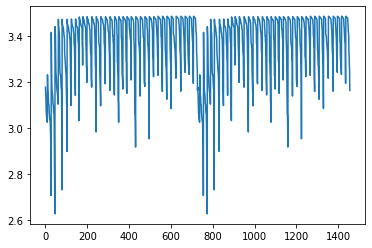

In [0]:
X=pdf_new.drop('F',axis=1)
y=pdf_new['F']
print(y)
y=y.values
plt.plot(np.arange(0,1456),y)
plt.show()

In [0]:
print(pdf_new)

              A          B          C         D         E         F
1345  20.888912  28.734354  30.437384  0.885943  0.535349  3.367826
1025  25.791825   6.197020  32.389241 -2.785593  0.856063  3.455027
515   17.174502  23.564798  31.684886  1.380710  1.507188  3.293140
1066  29.153461   9.106574  35.931921 -1.478850  0.665020  3.472707
1050  22.139138  12.422386  33.015392 -1.328431  1.193253  3.402026
...         ...        ...        ...       ...       ...       ...
117   21.661750   1.037443  25.695562 -2.121292  1.421280  3.391157
752   16.496047   2.247305  16.300522  0.874514  1.430571  2.994230
926   27.989773   3.307732  36.144803 -3.890250  0.355827  3.198088
196   20.425872  10.688530  24.777154 -1.377705 -0.379264  3.272534
1040  27.089304   1.511367  37.213440  0.908710  1.226171  3.476671

[1456 rows x 6 columns]


In [0]:
#print(pdf_new.head())
X=pdf_new.drop('F',axis=1)
y=pdf_new['F']

#normalizing values
# x=X.values
# x=x.T
# k=np.std(x,1).reshape(5,1)**2
# X_norm=(x-np.mean(x,1).reshape(5,1))/k
# X_norm=X_norm.T
X=np.round(X.values,5)
y_scale,indices=np.unique(np.round(y.values,5),return_index=True)
y_scale=y_scale.reshape(y_scale.shape[0],1)
#y_scale=(y_scale*1000)%1000
X_scale=np.empty((y_scale.shape[0],5))
print(X_scale.shape)
j=0
print(X[0])
for i in indices:
  X_scale[j]=X[i]
  j+=1
shuffle=np.append(X_scale,y_scale,axis=1)
np.random.shuffle(shuffle)
y_scale=shuffle[:,-1].reshape(shuffle.shape[0],1)
X_scale=shuffle[:,:5]
from sklearn import preprocessing
X_scale = preprocessing.scale(X_scale)
#y_scale = preprocessing.scale(y_scale)
X_test = X_scale[150:]
y_test = y_scale[150:]

(378, 5)
[20.88891 28.73435 30.43738  0.88594  0.53535]


In [0]:
print(y_scale.shape)
print(y_test.shape)
print(X_scale.shape)
print(X_test.shape)
print(y_scale)

(378, 1)
(228, 1)
(378, 5)
(228, 5)
[[3.47366]
 [3.27483]
 [3.28421]
 [3.38584]
 [3.39116]
 [2.86338]
 [3.33031]
 [3.24192]
 [3.24173]
 [3.38736]
 [3.22023]
 [3.27253]
 [3.05105]
 [3.32986]
 [3.47147]
 [3.33318]
 [3.40213]
 [3.27082]
 [3.23094]
 [3.23641]
 [3.43916]
 [3.40462]
 [3.3329 ]
 [3.46249]
 [3.44849]
 [3.33641]
 [3.04274]
 [3.10929]
 [3.41207]
 [3.21777]
 [3.03232]
 [3.26093]
 [3.43736]
 [3.4351 ]
 [2.91655]
 [3.44093]
 [3.42517]
 [3.38295]
 [3.26894]
 [3.41353]
 [3.2163 ]
 [3.42515]
 [3.34171]
 [3.27421]
 [3.22145]
 [3.45419]
 [3.3204 ]
 [3.39905]
 [3.2704 ]
 [3.19384]
 [3.45267]
 [3.44432]
 [3.29002]
 [2.70543]
 [3.42528]
 [3.21194]
 [3.41776]
 [3.45212]
 [3.42591]
 [3.28886]
 [3.4275 ]
 [3.38546]
 [3.43827]
 [3.0841 ]
 [2.93156]
 [3.28676]
 [3.28575]
 [3.39156]
 [3.33347]
 [3.06131]
 [3.48091]
 [3.40787]
 [3.34114]
 [3.28731]
 [3.03144]
 [2.6833 ]
 [3.18898]
 [3.11983]
 [3.3147 ]
 [3.47387]
 [3.19979]
 [3.46252]
 [3.2606 ]
 [3.11656]
 [3.22593]
 [3.43462]
 [3.20528]
 [3.289

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
def NNRegressionAdam1():
  model = tf.keras.Sequential()
  # Adds a densely-connected layer with 64 units to the model:
  model.add(layers.Dense(64, input_dim=5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.001)))
  #keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
  #model.add(layers.Dropout(0.6))
# Add another:
  #model.add(layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.001)))
  #model.add(layers.Dropout(0.6))
  # #keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
    # # Add another:
  #model.add(layers.Dense(4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.001)))
  # #keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
  #model.add(layers.Dropout(0.2))
    # Add the output layer
  model.add(layers.Dense(1))
  
  #optimizer = tf.keras.optimizers.RMSprop(lr=0.00001)
  #optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.0, nesterov=False)
  #optimizer=tf.keras.optimizers.GD(learning_rate=0.001)
  optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
  model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
  return model

In [0]:
X1,y1=X_scale[0:300],y_scale[0:300]
X2,y2=X_scale[300:600],y_scale[300:600]
X3,y3=X_scale[600:900],y_scale[600:900]
X4,y4=X_scale[900:1200],y_scale[900:1200]
X5,y5=X_scale[1200:1500],y_scale[1200:1500]
X6,y6=X_scale[1500:],y_scale[1500:]
print(y1)
X_list=[[X1,y1.reshape(300,1)],[X2,y2.reshape(300,1)],[X3,y3.reshape(300,1)],[X4,y4.reshape(300,1)],[X5,y5.reshape(300,1)],[X6,y6.reshape(487,1)]]
#print(y1)
X_test,y_test,X_train,y_train=0,0,0,0
train_mse=0
test_mse=0
models=[]
for i in range(0,6):
    print("run:",i+1)
    X_test=X_list[i][0]
    y_test=X_list[i][1]
    X_train=np.empty((0,5))
    y_train=np.empty((0,1))
    for j in range(0,i):
        X_train=np.append(X_train,X_list[j][0],axis=0)
        y_train=np.append(y_train,X_list[j][1],axis=0)
    for j in range(i+1,6):
        X_train=np.append(X_train,X_list[j][0],axis=0)
        y_train=np.append(y_train,X_list[j][1],axis=0)
    model=NNRegressionAdam1()
    print("train run")
    history=model.fit(X_train, y_train, validation_split=0, batch_size=32, epochs=5000)
    models.append(model)
    train_mse+=history.history['loss'][-1]
    print("test run")
    test_mse+=model.evaluate(X_test,y_test)[0]
train_mse/=5
test_mse/=5
print("Train_mse",train_mse)
print("Test_mse",test_mse)

In [0]:
# from keras.wrappers.scikit_learn import KerasRegressor

# tf.set_random_seed(2)

# estimator_adam = KerasRegressor(build_fn=NNRegressionAdam1)
# # earlystopper = tf.keras.callbacks.EarlyStopping(monitor='cosine_proximity', baseline=0.99, verbose=True)
estimator_adam=NNRegressionAdam1()
print(y_scale.shape)
#estimator.fit(X_train, y_train, validation_split=0.1, callbacks=[earlystopper], batch_size=1024)
history_adam = estimator_adam.fit(X_scale, y_scale, validation_split=0.2,batch_size=64, epochs=5000)
# loss: 0.3994 - mean_absolute_error: 0.4421 - val_loss: 0.6829 - val_mean_absolute_error: 0.6107

(378, 1)
Train on 302 samples, validate on 76 samples
Epoch 1/5000
302/302 [==============================] - 0s 451us/sample - loss: 10.8218 - mean_absolute_error: 3.2505 - val_loss: 10.2177 - val_mean_absolute_error: 3.1533
Epoch 2/5000
302/302 [==============================] - 0s 97us/sample - loss: 10.0667 - mean_absolute_error: 3.1322 - val_loss: 9.4758 - val_mean_absolute_error: 3.0342
Epoch 3/5000
302/302 [==============================] - 0s 83us/sample - loss: 9.3414 - mean_absolute_error: 3.0148 - val_loss: 8.7650 - val_mean_absolute_error: 2.9145
Epoch 4/5000
302/302 [==============================] - 0s 79us/sample - loss: 8.6577 - mean_absolute_error: 2.8983 - val_loss: 8.0883 - val_mean_absolute_error: 2.7953
Epoch 5/5000
302/302 [==============================] - 0s 77us/sample - loss: 8.0021 - mean_absolute_error: 2.7812 - val_loss: 7.4488 - val_mean_absolute_error: 2.6771
Epoch 6/5000
302/302 [==============================] - 0s 73us/sample - loss: 7.3868 - mean_abso

In [0]:
 estimator_adam.evaluate(X_scale,y_scale)

378/378 [==============================] - 0s 88us/sample - loss: 0.0067 - mean_absolute_error: 0.0539


[0.006659407700811114, 0.05385335]

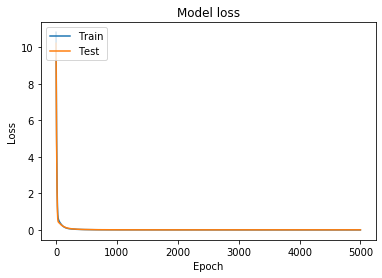

In [0]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
a=estimator_adam.predict(X_test)
print(np.around(np.array([a,y_test]).T,5))

[[[3.38716 3.3941 ]
  [3.24518 3.12463]
  [3.34585 3.45298]
  [3.42591 3.4466 ]
  [3.1939  3.21932]
  [3.35848 3.46397]
  [3.43172 3.45503]
  [3.41495 3.38413]
  [3.24874 3.31997]
  [3.28894 3.30856]
  [2.59987 2.62532]
  [3.30324 3.22606]
  [3.42535 3.45042]
  [3.30559 3.18246]
  [3.37724 3.36157]
  [3.35905 3.48425]
  [3.30201 3.16903]
  [3.4493  3.44758]
  [3.37561 3.46384]
  [3.4268  3.40203]
  [3.4118  3.47667]
  [3.09528 3.15462]
  [3.36179 3.39818]
  [3.09482 3.10326]
  [3.25654 3.15864]
  [3.25959 3.19344]
  [3.36104 3.34526]
  [3.22649 3.06086]
  [3.29521 3.02465]
  [3.44575 3.45846]
  [3.1969  3.22586]
  [3.3952  3.45138]
  [3.1106  3.14362]
  [3.4215  3.41498]
  [3.1113  3.16804]
  [3.36717 3.32584]
  [3.4273  3.43712]
  [3.07944 3.13453]
  [3.42422 3.43406]
  [3.40997 3.41818]
  [3.41249 3.38571]
  [3.34729 3.3416 ]
  [3.37505 3.26832]
  [3.25135 3.19809]
  [3.39549 3.45086]
  [3.2457  3.2406 ]
  [3.21207 3.36222]
  [3.39858 3.48618]
  [3.33726 3.32088]
  [3.4166  3.45519]


In [0]:
estimator_adam.save("mymodel2.h5")


In [0]:
np.save("hist2.npy",history_adam.history)

In [0]:
a=np.load("hist2.npy",allow_pickle=True)

In [0]:
print(a)

{'loss': [12.100337805337464, 10.181870618403353, 8.517884169193293, 7.023377787987918, 5.667504449553837, 4.487533885122135, 3.513658536191018, 2.793811685991603, 2.3058186177386353, 1.9830757008483078, 1.7649073671820938, 1.6090440371178634, 1.4861660603655884, 1.4031133067528934, 1.3388455261457834, 1.2885601607379535, 1.2553769563207564, 1.218768981908331, 1.1897865841720279, 1.1639184114948804, 1.141332915287144, 1.1193401947716215, 1.09797648878287, 1.0785255183447275, 1.0589151216658534, 1.0404954623702347, 1.02185709429103, 1.0040977111715355, 0.9867769838958387, 0.9691274600313199, 0.951870927352779, 0.9357111754006897, 0.9184838478138905, 0.9029497030555018, 0.8863605245059689, 0.8708234918828042, 0.8560839816434493, 0.8405010858118929, 0.8263419440250523, 0.811429322950098, 0.7970732876796596, 0.7826377508656078, 0.7692747222666709, 0.7560037066604918, 0.7429741605228146, 0.7302102951814007, 0.7176327693541318, 0.7047547275656896, 0.6933205763235787, 0.6803886136471831, 0.66